Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Ensemble techniques combine multiple models to improve prediction accuracy and robustness. Bagging and boosting differ in how they build and combine models: bagging trains models independently in parallel, while boosting trains them sequentially to correct previous errors.

Fundamental Idea Behind Ensemble Techniques
- Core Concept: Ensemble learning aims to create a stronger predictive model by combining several weaker models (often called base learners).

- Why It Works: It leverages the “wisdom of the crowd”—different models compensate for each other's weaknesses, reducing errors and improving generalization.

- Common Methods: Bagging, Boosting, Stacking, and Blending.

Bagging (Bootstrap Aggregating)
- Approach:

  - Trains multiple models independently and in parallel.

  - Each model is trained on a random subset of the data (with replacement).

  - Final prediction is made by averaging (for regression) or majority voting (for classification).

Objective: Reduce variance and prevent overfitting.

Example Algorithms: Random Forest, Bagged Decision Trees.

Boosting
- Approach:

  - Trains models sequentially, where each model tries to correct the errors of the previous one.

  - Focuses more on hard-to-predict instances by giving them higher weights.

  - Final prediction is a weighted combination of all models.

Objective: Reduce bias and improve accuracy.

Example Algorithms: AdaBoost, Gradient Boosting, XGBoost.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

Random Forest reduces overfitting by combining multiple decision trees trained on random subsets of data and features, which introduces diversity and lowers variance. Two key hyperparameters—n_estimators and max_depth—help control model complexity and generalization.

Why Single Decision Trees Overfit
- High Variance: A single decision tree tends to fit the training data very closely, capturing noise and specific patterns that don’t generalize well.

- Greedy Splitting: Trees split until pure leaf nodes, which can lead to overly complex models.

- Sensitive to Data: Small changes in data can drastically alter the tree structure.

How Random Forest Reduces Overfitting
- Ensemble Averaging: Random Forest builds many decision trees and averages their predictions (classification: majority vote; regression: mean), smoothing out individual tree errors.

- Bootstrap Sampling: Each tree is trained on a different random subset of the data (with replacement), reducing correlation between trees.

- Feature Randomness: At each split, only a random subset of features is considered, which prevents dominant features from skewing all trees.

This combination of randomness and averaging leads to lower variance and better generalization compared to a single tree.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

Stacking is an ensemble learning technique that combines multiple diverse models by training a meta-model to learn how best to combine their predictions. Unlike bagging and boosting, which typically use homogeneous models and focus on reducing variance or bias, stacking leverages model diversity to improve predictive performance.

What Is Stacking?
- Definition: Stacking (or stacked generalization) is an ensemble method that combines predictions from multiple base models (level-0 models) using a higher-level model (meta-learner or level-1 model).

- How It Works:

  - Train several different models on the training data.

  - Use their predictions as input features for a new model (meta-model).
  - The meta-model learns to optimally combine these predictions to make the final output.
  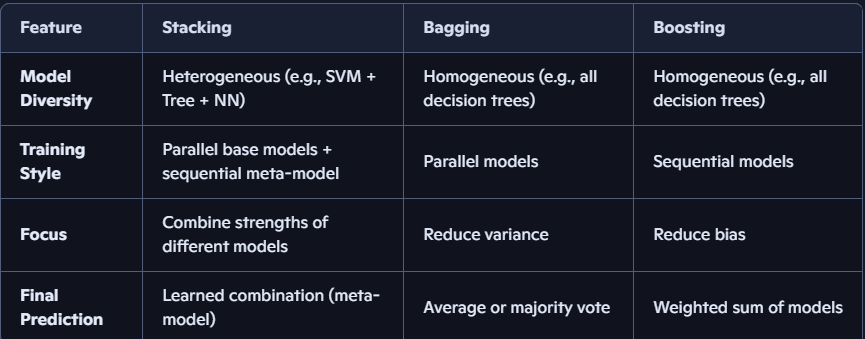



Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

The Out-of-Bag (OOB) Score in Random Forest is an internal validation metric that estimates model accuracy using data not seen by individual trees during training. It allows for reliable model evaluation without needing a separate validation set.

What Is the OOB Score?
- Definition: The Out-of-Bag (OOB) Score is a performance metric computed during the training of a Random Forest.

- How It Works:

  - Each tree in the forest is trained on a bootstrap sample (random subset with replacement).

  - About one-third of the data is left out of each tree’s training set—these are called out-of-bag samples.

  - These OOB samples are then used to test the tree’s predictions.

  - The final OOB score is the aggregated accuracy across all trees using their respective OOB samples.

  Why Is It Useful?
- No Need for a Separate Validation Set: OOB evaluation uses the training data itself, saving data and computation.

- Efficient and Reliable: It provides a nearly unbiased estimate of generalization performance, similar to cross-validation.

- Built-in Feature: Most Random Forest implementations (like in scikit-learn) support OOB scoring with a simple parameter (oob_score=True).

How It Helps in Model Evaluation
- Internal Validation: Since each tree is evaluated on unseen data (its OOB samples), the model gets a realistic sense of how it performs on new data.

- Avoids Data Leakage: OOB samples are never used in training the corresponding tree, ensuring clean evaluation.

- Quick Feedback: You can monitor model performance during training without splitting the dataset or running cross-validation.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

AdaBoost and Gradient Boosting are both boosting algorithms that improve model performance by focusing on errors from previous learners, but they differ in how they handle those errors, adjust weights, and their typical applications.

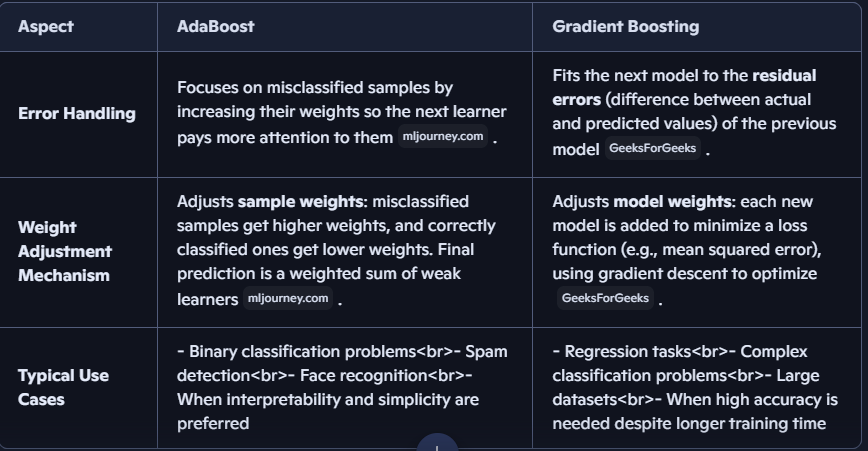

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost performs well on categorical features because it uses advanced encoding techniques like target-based statistics and ordered boosting, eliminating the need for manual preprocessing such as one-hot encoding or label encoding. This makes it highly efficient and accurate for datasets with many categorical variables.

- Target-Based Encoding (CTR Encoding):

  - CatBoost transforms categorical features into numerical ones using Conditional Target Statistics (CTR).

  - It calculates statistics like the average target value for each category, helping the model capture meaningful patterns.

  - This is done in a way that avoids target leakage by using only part of the data for each transformation.
- Ordered Boosting:

  - Traditional boosting methods can suffer from overfitting due to target leakage during encoding.

  - CatBoost uses ordered boosting, which ensures that the encoding for each data point is based only on data seen before it in the training sequence.

  - This technique simulates online learning and prevents the model from learning from future data.
- No Need for Manual Encoding:

  - Unlike other models that require one-hot or label encoding, CatBoost automatically detects and processes categorical features.

  - This saves time and reduces the risk of introducing bias or noise through improper encoding.
- Efficient Handling of High Cardinality:

  - CatBoost can handle features with many unique categories (e.g., zip codes, product IDs) without exploding the feature space.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [2]:
#1. Load the Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load data
wine = load_wine()
X, y = wine.data, wine.target

#2. Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#3. Train KNN (K=5) Without Scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluation
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Unscaled Classification Report:\n", classification_report(y_test, y_pred_unscaled))

#4. Apply StandardScaler and Retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluation
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Scaled Classification Report:\n", classification_report(y_test, y_pred_scaled))

#5. Optimize K and Distance Metric with GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

#6. Train Optimized KNN and Compare
best_knn = grid.best_estimator_
y_pred_optimized = best_knn.predict(X_test_scaled)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized))



Unscaled Accuracy: 0.7222222222222222
Unscaled Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Scaled Accuracy: 0.9444444444444444
Scaled Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best CV Score: 0.9756666666666666
Optimi

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

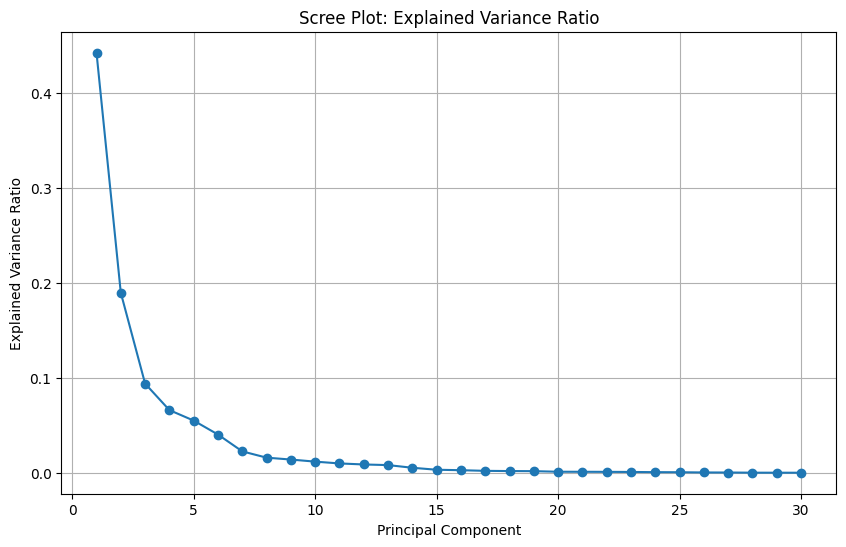

Number of components to retain 95% variance: 10
Accuracy on original data: 0.9591
Accuracy on PCA-transformed data: 0.9649


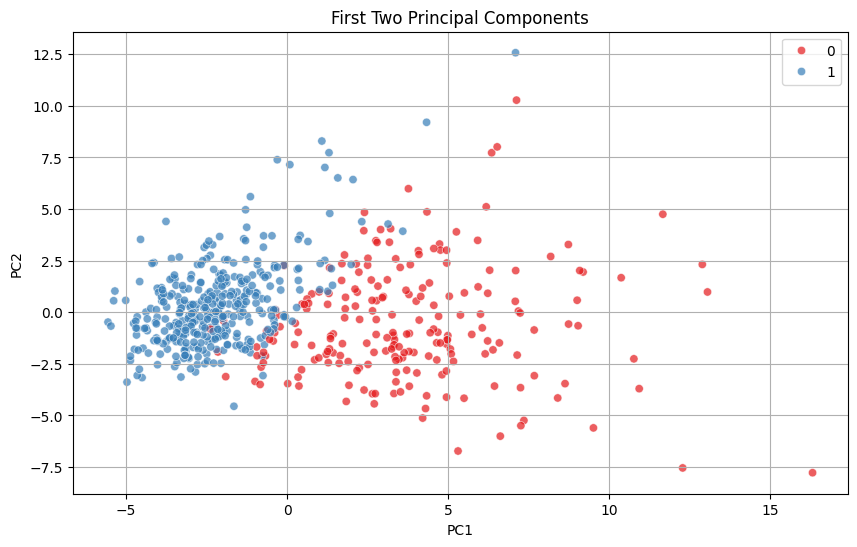

In [3]:
#1. Load the Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

#2. Apply PCA and Plot Scree Plot
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot: Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#3. Retain 95% Variance and Transform Dataset
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

#4. Train KNN on Original vs PCA-Transformed Data
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca_95, test_size=0.3, random_state=42)

# KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy on original data: {acc_orig:.4f}")
print(f"Accuracy on PCA-transformed data: {acc_pca:.4f}")

#5. Visualize First Two Principal Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff

MSE (Euclidean): 4460.16
MSE (Manhattan): 5159.91


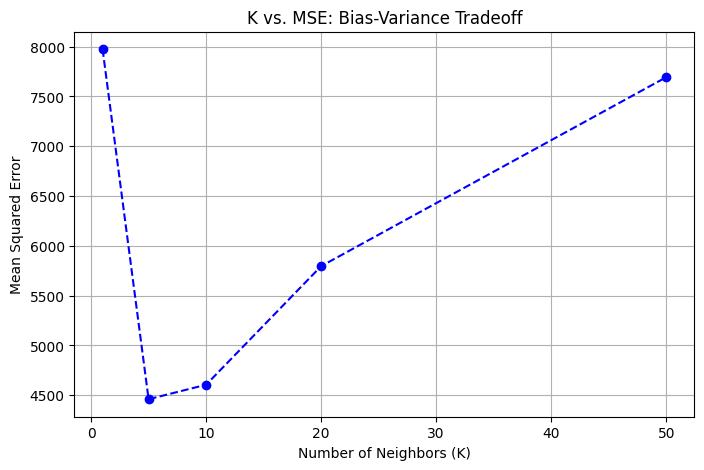

In [4]:
#Step 1: Generate Synthetic Regression Dataset
from sklearn.datasets import make_regression

# Create synthetic dataset
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)


#Step 2: Train KNN Regressor with Euclidean and Manhattan Distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean distance (default)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print(f"MSE (Euclidean): {mse_euclidean:.2f}")
print(f"MSE (Manhattan): {mse_manhattan:.2f}")

#Step 3: Analyze Bias-Variance Tradeoff with Varying K
import matplotlib.pyplot as plt

k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='blue')
plt.title('K vs. MSE: Bias-Variance Tradeoff')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()



Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).


Saving Pima Indians Diabetes.csv to Pima Indians Diabetes (2).csv
BRUTE → Accuracy: 0.7208, Time: 0.0082 sec
KD_TREE → Accuracy: 0.7208, Time: 0.0086 sec
BALL_TREE → Accuracy: 0.7208, Time: 0.0092 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


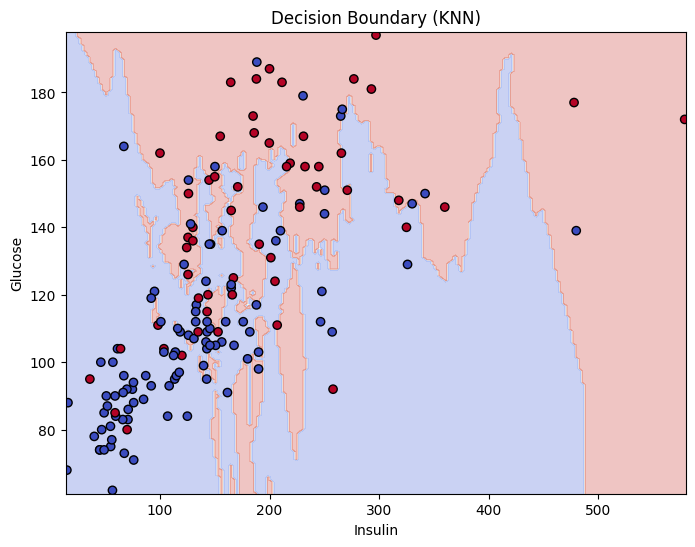

In [8]:
#Step 1: Load and Impute Missing Values
import pandas as pd
from sklearn.impute import KNNImputer

from google.colab import files

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Pima Indians Diabetes.txt")

import numpy as np

# Replace zeros with np.nan (not pd.nan!)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#Step 2: Train KNN with Brute-force, KD-Tree, and Ball Tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

X = df_imputed.drop("Outcome", axis=1)
y = df_imputed["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

for algo in ['brute', 'kd_tree', 'ball_tree']:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()
    results[algo] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "training_time": end - start
    }

for method, metrics in results.items():
    print(f"{method.upper()} → Accuracy: {metrics['accuracy']:.4f}, Time: {metrics['training_time']:.4f} sec")
#Step 3: Plot Decision Boundary for Best Method
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Find top 2 features via importance
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')  # assuming KD-Tree is best
knn_best.fit(X_train, y_train)
result = permutation_importance(knn_best, X_test, y_test, n_repeats=10, random_state=42)
top2_idx = np.argsort(result.importances_mean)[-2:]
top2_features = X.columns[top2_idx]

# Retrain using only top 2 features
X2_train = X_train[top2_features]
X2_test = X_test[top2_features]
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y_train)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel(top2_features[0])
    plt.ylabel(top2_features[1])
    plt.title("Decision Boundary (KNN)")
    plt.show()

plot_decision_boundary(knn2, X2_test, y_test)
